In [1]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
import torch

import torchvision
import time

from models import VAE, IVAE, ConvolutionalDRAW
from train import train_geco, train_beta, train_geco_draw
from functions import sample_vae, marginal_KL, Compute_NLL
import datasets

In [7]:
def plot_gallery(images, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(3 * n_col, 1.9 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray, vmin=-1, vmax=1, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

In [2]:
dataset = 'mnist'

if dataset == 'mnist':
    train_set = datasets.MNIST('./data/'+dataset+'/',  download=True, train=True, \
                                            transform=torchvision.transforms.ToTensor())
    test_set = datasets.MNIST('./data/'+dataset+'/',  download=True, train=False, \
                                            transform=torchvision.transforms.ToTensor())
    input_size = (28, 28)
    
elif dataset == 'cifar10':
    train_set = datasets.CIFAR10('./data/'+dataset+'/',  download=True, train=True, \
                                            transform=torchvision.transforms.ToTensor())
    test_set = datasets.CIFAR10('./data/'+dataset+'/',  download=True, train=False, \
                                            transform=torchvision.transforms.ToTensor())
    input_size = (32, 32)
else:
    train_set = datasets.CELEBA('./data/'+dataset+'/', train=True, \
                                            transform=torchvision.transforms.ToTensor())
    test_set = datasets.CELEBA('./data/'+dataset+'/',  train=False, \
                                            transform=torchvision.transforms.ToTensor())
    input_size = (218,178)
    
    
batch_size = 300
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)


Extracting ./data/mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./data/mnist/MNIST\raw




Extracting ./data/mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/mnist/MNIST\raw




Extracting ./data/mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST\raw




Extracting ./data/mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST\raw



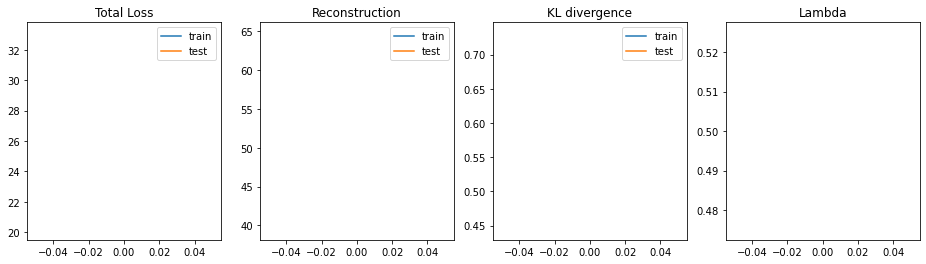

Epoch 1 of 200 took 50.588s
  training loss (in-iteration): 	20.156472
  validation loss (in-iteration): 	33.154722


KeyboardInterrupt: 

In [3]:
vae_model_geco =  VAE(dims = [28*28, 512, 256], dim_latent = 200)

optimizer = optim.Adam(vae_model_geco.parameters(), lr=1e-3)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, verbose=True)
scheduler = None
train_geco(vae_model_geco, optimizer, scheduler, 
           train_loader = train_loader, 
           valid_loader = test_loader, lbd_step = 100, 
           num_epochs=200,lambd_init = torch.FloatTensor([0.5]),
           tol = 4)

In [4]:
cd_model = ConvolutionalDRAW(x_dim = 1, x_shape = input_size, h_dim = 256, T = 1)
optimizer = optim.Adam(cd_model.parameters(), lr=1e-3)
scheduler = None

train_geco_draw(cd_model, optimizer, scheduler, 
               train_loader = train_loader, 
               valid_loader = test_loader, 
                lbd_step = 100, 
               num_epochs=5, lambd_init = torch.FloatTensor([1]),
               tol = 0.6, pretrain = 0)

C:\Users\dovid\anaconda3\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\dovid\anaconda3\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


KeyboardInterrupt: 